In [7]:
import os
import PyPDF2
import fitz
import pandas as pd
import collections

In [8]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [9]:
dir = 'annoted_sustainability_reports/Info_Tech'

### Extracting Sentences

In [67]:
# aggregated sentences per report
highlighted_num = []
highlighted_sentences = [] 
all_sentences = []
highlighted_label = []
all_label = []

# aggregated sentences of the entire industry (tokenizing highlighted_result & all_result)
rel_text = []
rel_label = []
all_text_final = []

x_label = ["Accenture", "Broadcom", "Mastercard", "Nvidia", "Oracle", "Cisco", "Microsoft", "VIsa", "Adobe", "Apple"]


total_sent = [] # keep track of dictionaries of different paragraphs/sets of sentences

for file in os.listdir(dir): # running all the files in the industry folder
    f = os.path.join(dir, file) # joining filename and directory
    print(f)
    
    # labelling sentences by companies 
    res = list(filter(lambda x:  x in f, x_label))

    doc = fitz.open(f) # opening each company report
    print(doc)
    
    # results of each report
    highlighted_result = []
    all_result = []
    test_pos = 0 # keep track of whether values of coordinates increase or decrease --> 
    #reinitialize if decreases because that means its a new set of sentences (paragraph)
    
    test_dict = collections.defaultdict(list) # intialize a dictionary that keeps order and 
    # indication of where the sentence breaks occur
    
    repeat_coord = []
    
    # Iterate each page of the document 
    for page in doc:
        # extract all the sentences in pdf 
        test = page.get_text()
        all_result.append(test)
        
        # extracting highlighted sentences from pdf 
        highlights = []
        annot = page.first_annot
        
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        
#         coordinate_sum_total = []
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
#                 print()
#                 print(h) # printing coordinates of highlighted sentences 
#                 sent_pos = 0 
                
                for w in all_words:
                    if (fitz.Rect(w[0:4]).intersects(h)): 
                    # find intersections where the original report overlaps with the highlighted sentences
                        new_pos = int(str("%02d" % w[5]) + str("%02d" % w[6]) + str("%02d" % w[7])) 
                        if new_pos not in repeat_coord:
                            repeat_coord.append(new_pos)
    #                         print(test_pos, new_pos)
                            if test_pos <  new_pos:
                                print('less than', test_pos, new_pos, w[4])
                                test_pos = new_pos 
                                test_dict[new_pos].append(w[4])
                                total_sent.append({new_pos : test_dict[new_pos]})
                            else:
                                print('greater than', test_pos, new_pos, w[4])
                                test_dict = collections.defaultdict(list)
                                test_pos = 0
                                test_dict[new_pos].append(w[4])
                                total_sent.append({new_pos : test_dict[new_pos]})
                        else:
                            continue
#             total_sent.append(test_dict)

#                         if str(sum(w[0:4])) not in coordinate_sum_total: #if no duplicate coordinate sum found, append
#                             coordinate_sum_total.append(str(sum(w[0:4])))
#                             test_pos = int(str("%02d" % w[5]) + str("%02d" % w[6]) + str("%02d" % w[7]))
# #                             print(w[4], test_pos, sent_pos)
#                             if test_pos > sent_pos:
#                                 print(test_pos, sent_pos, w[4])
#                                 sent_pos = test_pos
# #                                 print(sent_pos)
#                                 sentence.append(w[4])
                            
        
#                 highlight_text.append(" ".join(sentence))
        
#         print(highlight_text)
    
        if len(highlight_text) > 0:
            highlighted_result.append(" ".join(highlight_text))
        
#         print(highlighted_result)

    # Results of the entire industry & keeps track of number of sentences in highlighted_num
    highlighted_num.append(len(highlighted_result))
    highlighted_sentences.append(highlighted_result)
    all_sentences.append(all_result)
    
    print(len(highlighted_result))
    
#         print(test_text)
        
    for r in highlighted_result:
        if r is not None:
            # tokenize sentences by pages where the sentences is found 
            # instead of conducting it to the entire report this enhances accuracy 
            rel_text += tokenize.sent_tokenize(r)
            highlighted_label.append(res)
            rel_label += res * len(tokenize.sent_tokenize(r))         
    
    for i in all_result:
        all_text_final += tokenize.sent_tokenize(i.replace("\n", " "))
        all_label += res * len(tokenize.sent_tokenize(i.replace("\n", " ")))
        
#     print(highlighted_sentences, "\n", len(highlighted_sentences))



annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf
Document('annoted_sustainability_reports/Info_Tech/Accenture_FY2021_Statutory_Sustainability_report.pdf')
less than 0 170006 In
less than 170006 170007 this
less than 170007 170008 context
less than 170008 180000 we
less than 180000 180001 announced
less than 180001 180002 three
less than 180002 180003 new
less than 180003 180004 industry-leading
less than 180004 180005 environmental
less than 180005 180006 goals
less than 180006 190000 in
less than 190000 190001 October
less than 190001 190002 2020:
less than 190002 190003 achieve
less than 190003 190004 net-zero
less than 190004 190005 emissions
less than 190005 190006 by
less than 190006 190007 2025,
less than 190007 190008 move
less than 190008 190009 to
less than 190009 200000 zero
less than 200000 200001 waste
less than 200001 200002 and
less than 200002 200003 plan
less than 200003 200004 for
less than 200004 200005 water
less than 2000

0
annoted_sustainability_reports/Info_Tech/Broadcom_ESG_report.pdf
Document('annoted_sustainability_reports/Info_Tech/Broadcom_ESG_report.pdf')
less than 0 50001 Purchasing
less than 50001 50002 several
less than 50002 50003 additional
less than 50003 50004 GHG
less than 50004 50005 abatement
less than 50005 50006 units
less than 50006 50007 in
less than 50007 50008 2021
less than 50008 50009 that
less than 50009 50010 are
less than 50010 50100 expected
less than 50100 50101 to
less than 50101 50102 result
less than 50102 50103 in
less than 50103 50104 a
less than 50104 50105 14%
less than 50105 50106 reduction
less than 50106 50107 in
less than 50107 50108 greenhouse
less than 50108 50109 gas
less than 50109 50110 emissions
less than 50110 50200 at
less than 50200 50201 our
less than 50201 50202 Fort
less than 50202 50203 Collins
less than 50203 50204 manufacturing
less than 50204 50205 facility
less than 50205 60001 Upgrading
less than 60001 60002 one
less than 60002 60003 chiller
le

less than 30604 30700 and
less than 30700 30701 contributions.
less than 30701 30702 These
less than 30702 30703 include
less than 30703 30704 green
less than 30704 30800 buildings,
less than 30800 30801 technologies
less than 30801 30802 and
less than 30802 30803 social
less than 30803 30900 programs
less than 30900 30901 such
less than 30901 30902 as
less than 30902 30903 Mastercard
less than 30903 30904 Impact
less than 30904 31000 Fund,
less than 31000 31001 COVID-19
less than 31001 31002 response,
less than 31002 31003 and
less than 31003 31004 others
less than 31004 31100 with
less than 31100 31101 a
less than 31101 31102 commercially
less than 31102 31103 sustainable
less than 31103 31104 impact.
greater than 31104 10203 which
less than 0 10204 unites
less than 10204 10300 our
less than 10300 10301 partners
less than 10301 10302 in
less than 10302 10303 the
less than 10303 10304 commitment
less than 10304 10305 to
less than 10305 10400 restore
less than 10400 10401 100
less than

less than 40003 110000 Environmental
0
annoted_sustainability_reports/Info_Tech/Nvidia_2022_CSR_report.pdf
Document('annoted_sustainability_reports/Info_Tech/Nvidia_2022_CSR_report.pdf')
less than 0 20000 By
less than 20000 20001 the
less than 20001 20002 end
less than 20002 20003 of
less than 20003 20004 the
less than 20004 20005 fiscal
less than 20005 20006 year
less than 20006 20007 ending
less than 20007 20008 January
less than 20008 20009 31,
less than 20009 20010 2025,
less than 20010 20011 we
less than 20011 20012 plan
less than 20012 20013 to
less than 20013 20014 purchase
less than 20014 20015 or
less than 20015 20100 generate
less than 20100 20101 enough
less than 20101 20102 renewable
less than 20102 20103 energy
less than 20103 20104 to
less than 20104 20105 match
less than 20105 20106 100%
less than 20106 20107 of
less than 20107 20108 our
less than 20108 20109 global
less than 20109 20110 electricity
less than 20110 20111 usage
less than 20111 20200 for
less than 20200 20

0
annoted_sustainability_reports/Info_Tech/Microsoft_2021_Environmental_Sustainability_Report.pdf
Document('annoted_sustainability_reports/Info_Tech/Microsoft_2021_Environmental_Sustainability_Report.pdf')
less than 0 100000 Our
less than 100000 100001 commitment:
less than 100001 100002 carbon
less than 100002 100003 negative
less than 100003 100004 by
less than 100004 100005 2030
less than 100005 110000 and
less than 110000 110001 by
less than 110001 110002 2050
less than 110002 110003 to
less than 110003 110004 remove
less than 110004 110005 from
less than 110005 110006 the
less than 110006 110007 atmosphere
less than 110007 110008 an
less than 110008 110009 equivalent
less than 110009 110010 amount
less than 110010 110011 of
less than 110011 110012 all
less than 110012 110013 the
less than 110013 110014 carbon
less than 110014 110015 dioxide
less than 110015 110016 our
less than 110016 110100 company
less than 110100 110101 has
less than 110101 110102 emitted
less than 110102 11010

less than 120303 120304 increase
less than 120304 120305 in
less than 120305 120306 sales
less than 120306 120307 and
less than 120307 120308 usage
less than 120308 120400 of
less than 120400 120401 our
less than 120401 120402 devices.
less than 120402 270100 efficient
less than 270100 270101 is
less than 270101 270102 a
less than 270102 270103 key
less than 270103 270104 first
less than 270104 270105 step
less than 270105 270106 in
less than 270106 270107 reducing
less than 270107 270108 our
less than 270108 270109 emissions.
less than 270109 270200 We
less than 270200 270201 are
less than 270201 270202 changing
less than 270202 270203 the
less than 270203 270204 way
less than 270204 270205 we
less than 270205 270206 build
less than 270206 270207 and
less than 270207 270208 operate
less than 270208 270209 facilities,
less than 270209 270300 using
less than 270300 270301 all-electric
less than 270301 270302 efficient
less than 270302 270303 system
less than 270303 270304 designs
less t

less than 130806 160103 viable
less than 160103 160104 green
less than 160104 160105 energy
less than 160105 160106 for
less than 160106 160107 backup
less than 160107 160108 power
less than 160108 160109 at
less than 160109 160202 We
less than 160202 160203 announced
less than 160203 160204 a
less than 160204 160205 worldwide
less than 160205 160206 first
less than 160206 160207 in
less than 160207 160300 2020—hydrogen
less than 160300 160301 fuel
less than 160301 160302 cells
less than 160302 160303 powering
less than 160303 160304 a
less than 160304 160305 row
less than 160305 160306 of
less than 160306 160307 datacenter
greater than 160307 160200 our
less than 0 160201 datacenters.
less than 160201 160400 servers
less than 160400 160401 for
less than 160401 160402 48
less than 160402 160403 consecutive
less than 160403 160404 hours.
less than 160404 160405 This
less than 160405 160406 successful
less than 160406 160407 pilot
less than 160407 160500 provided
less than 160500 160501 

less than 90008 90205 rate
less than 90205 90206 for
less than 90206 90207 the
less than 90207 90208 product’s
less than 90208 90305 percent,
less than 90305 90306 a
less than 90306 90307 key
less than 90307 90308 contributor
less than 90308 90309 to
less than 90309 90310 an
less than 90310 90400 overall
less than 90400 90401 product
less than 90401 90402 carbon
less than 90402 90403 reduction
less than 90403 90404 of
less than 90404 90405 30
less than 90405 90406 percent
less than 90406 90407 versus
less than 90407 90500 its
less than 90500 90501 predecessor,
less than 90501 90502 the
less than 90502 90503 Surface
less than 90503 90504 Book
less than 90504 90505 3
less than 90505 90506 13”.
greater than 90506 90408 of
less than 0 90507 100
less than 90507 90508 percent
less than 90508 90600 renewable
less than 90600 90601 energy.
less than 90601 90602 This
less than 90602 90603 facility
less than 90603 90604 now
less than 90604 90605 generates
less than 90605 90606 1.3
less than 90606

less than 160608 160700 Canada,
less than 160700 160701 reforestation
less than 160701 160702 in
less than 160702 160703 Brazil,
less than 160703 160704 renewable
less than 160704 160705 energy
less than 160705 160706 in
less than 160706 160800 Turkey
less than 160800 160801 and
less than 160801 160802 clean
less than 160802 160803 cookstoves
less than 160803 160804 in
less than 160804 160805 India
less than 160805 160806 and
less than 160806 160807 Uganda.
greater than 160807 10000 Energy
less than 0 10001 &
less than 10001 10002 GHG
less than 10002 10003 Emissions
less than 10003 90900 Ecolytiq’s
less than 90900 90901 solution
less than 90901 90902 analyzes
less than 90902 90903 payment
less than 90903 90904 transactions
less than 90904 90905 in
less than 90905 91000 real-time
less than 91000 91001 to
less than 91001 91002 calculate
less than 91002 91003 carbon
less than 91003 91004 dioxide
less than 91004 91005 (CO2)
less than 91005 91006 footprints
less than 91006 91100 on
less tha

less than 10605 10700 credits
less than 10700 10701 (RECs)
less than 10701 10702 and
less than 10702 10703 0.5
less than 10703 10704 million
less than 10704 10705 metric
less than 10705 10800 tons
less than 10800 10801 of
less than 10801 10802 carbon
less than 10802 10803 offsets
less than 10803 10804 to
less than 10804 10805 proportionally
less than 10805 10900 cover
less than 10900 10901 electricity
less than 10901 10902 use
less than 10902 10903 and
less than 10903 10904 direct
less than 10904 11000 emissions,
less than 11000 11001 respectively,
less than 11001 11002 across
less than 11002 11003 our
less than 11003 11004 value
less than 11004 11100 chain.5
less than 11100 11101 This
less than 11101 11102 represents
less than 11102 11103 a
less than 11103 11104 short-term
less than 11104 11200 bridging
less than 11200 80000 Corporate
less than 80000 80001 footprint
greater than 80001 20003 become
less than 0 20004 carbon
less than 20004 20005 neutral
less than 20005 20006 by
less tha

less than 40210 210000 Appendix
less than 210000 210001 A
less than 210001 210100 Greenhouse
less than 210100 210200 gas
less than 210200 210201 emissions
less than 210201 260000 Fiscal
less than 260000 260001 year
less than 260001 260002 2021
less than 260002 260003 energy
less than 260003 260004 and
less than 260004 260005 carbon
less than 260005 260006 footprint
less than 260006 260007 (corporate
less than 260007 260008 facilities)
0


In [68]:
total_sent

[{170006: ['In']},
 {170007: ['this']},
 {170008: ['context']},
 {180000: ['we']},
 {180001: ['announced']},
 {180002: ['three']},
 {180003: ['new']},
 {180004: ['industry-leading']},
 {180005: ['environmental']},
 {180006: ['goals']},
 {190000: ['in']},
 {190001: ['October']},
 {190002: ['2020:']},
 {190003: ['achieve']},
 {190004: ['net-zero']},
 {190005: ['emissions']},
 {190006: ['by']},
 {190007: ['2025,']},
 {190008: ['move']},
 {190009: ['to']},
 {200000: ['zero']},
 {200001: ['waste']},
 {200002: ['and']},
 {200003: ['plan']},
 {200004: ['for']},
 {200005: ['water']},
 {200006: ['risk.']},
 {110100: ['We’ll']},
 {110101: ['focus']},
 {110102: ['first']},
 {110103: ['on']},
 {110104: ['actual']},
 {110105: ['reductions']},
 {110106: ['in']},
 {120000: ['our']},
 {120001: ['emissions']},
 {120002: ['by']},
 {120003: ['powering']},
 {120004: ['our']},
 {120005: ['offices']},
 {130000: ['with']},
 {130001: ['100%']},
 {130002: ['renewable']},
 {130003: ['energy,']},
 {130004: ['eng

In [106]:
highlighted_num

[3, 3, 8, 4, 4, 4, 14, 5, 4, 17]

In [107]:
rel_text_df = pd.DataFrame([rel_text, rel_label]).transpose()
rel_text_df = rel_text_df.rename(columns = {0: 'relevant_sentences', 1: 'company_label'})
rel_text_df

,relevant_sentences,company_label
0,In this context we announced three new industr...,Accenture
1,We’ll focus first on actual reductions in our ...,Accenture
2,"To address remaining emissions, we’ll invest i...",Accenture
3,"In addition, at Accenture in Sweden, we have c...",Accenture
4,"To reach our net-zero goal by 2025, we will re...",Accenture
...,...,...
210,Appendix A Greenhouse gas emissions,Apple
211,Corporate facilities energy use,Apple
212,renewable energy projects,Apple
213,Fiscal year 2021 energy and carbon footprint (...,Apple


In [108]:
for i in rel_text_df.relevant_sentences:
    print(i)

In this context we announced three new industry-leading environmental goals in October 2020: achieve net-zero emissions by 2025, move to zero waste and plan for water risk.
We’ll focus first on actual reductions in our emissions by powering our offices with 100% renewable energy, engaging key suppliers to reduce their emissions and equipping our people to make climate-smart travel decisions.
To address remaining emissions, we’ll invest in proprietary, nature-based carbon removal solutions, such as large-scale tree planting, that will directly remove carbon emissions from the atmosphere.
In addition, at Accenture in Sweden, we have committed to reduce our CO2 emissions from air travel with 50% per employee by 2023, with fiscal year 2018 as the baseline.
To reach our net-zero goal by 2025, we will reduce emissions by powering offices with 100% renewable electricity, engaging key suppliers to reduce their emissions and equipping Accenture’s people to make climate-smart travel decisions.
B

In [92]:
rel_text_df[rel_text_df.duplicated()]

,relevant_sentences,company_label
48,Environmental,Mastercard


In [68]:
all_text_final_df = pd.DataFrame([all_text_final, all_label]).transpose()
all_text_final_df = all_text_final_df.rename(columns = {0: 'all_sentences', 1: 'company_label'})
all_text_final_df

,all_sentences,company_label
0,Shaping a sustainable future Accenture AB ...,Accenture
1,Statutory Sustainability Report 2021 | Accen...,Accenture
2,Statutory Sustainability Report 2021 | Accen...,Accenture
3,"At Accenture, we like to think of this as shar...",Accenture
4,Shared success will depend on the ability to ...,Accenture
...,...,...
10585,"Beats is a trademark of Beats Electronics, LL...",Apple
10586,iOS is a trademark or registered trademark of ...,Apple
10587,ENERGY STAR and the ENERGY STAR mark are regis...,Apple
10588,Other product and company names mentioned here...,Apple


### Getting Sentence Statistics 

In [69]:
# count rel sentences 
rel_count = rel_text_df.groupby('company_label', sort = False).count()

# count all sentences
sent_count = all_text_final_df.groupby('company_label', sort = False).count()

In [70]:
sentences_list = []
rel_sent_list = []

final_text_stat = pd.concat([sent_count, rel_count],  sort = False, axis = 1)

[rel_sent_list.append(rel_sent) for rel_sent in final_text_stat['relevant_sentences']]    
[sentences_list.append(all_sent) for all_sent in final_text_stat['all_sentences']]    
    
final_text_stat['relevant_sentences'] = final_text_stat['relevant_sentences'].fillna(0)
final_text_stat['percentages'] = final_text_stat['relevant_sentences'] / final_text_stat['all_sentences'] * 100
final_text_stat

,all_sentences,relevant_sentences,percentages
company_label,,,
Accenture,597,14,2.345059
Broadcom,541,11,2.033272
Mastercard,1211,29,2.394715
Nvidia,990,6,0.606061
Oracle,732,5,0.683060
Cisco,1520,16,1.052632
Microsoft,1967,81,4.117946
VIsa,644,12,1.863354
Adobe,216,5,2.314815


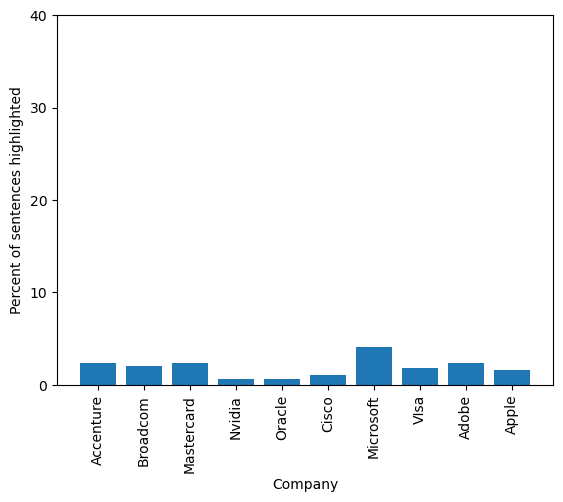

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Accenture", "Broadcom", "Mastercard", "Nvidia", "Oracle", "Cisco", "Microsoft", "VIsa", "Adobe", "Apple"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (rel_sent_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [11]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    10.000000
mean      1.906837
std       1.026585
min       0.606061
25%       1.203838
50%       1.948313
75%       2.337498
max       4.117946
dtype: float64

### Exporting and Saving Files 

In [12]:
#storing variable so they can be called between notebooks (for ML and aggregate work later on)

IT_reltext = rel_text_df
IT_alltext = all_text_final_df
IT_stat = final_text_stat

%store IT_reltext
%store IT_alltext
%store IT_stat

Stored 'IT_reltext' (DataFrame)
Stored 'IT_alltext' (DataFrame)
Stored 'IT_stat' (DataFrame)


### V4 Version of Sentence Extraction Code

In [1]:
# # aggregated sentences per report
# highlighted_num = []
# highlighted_sentences = [] 
# all_sentences = []
# highlighted_label = []
# all_label = []

# # aggregated sentences of the entire industry (tokenizing highlighted_result & all_result)
# rel_text = []
# rel_label = []
# all_text_final = []

# x_label = ["Accenture", "Broadcom", "Mastercard", "Nvidia", "Oracle", "Cisco", "Microsoft", "VIsa", "Adobe", "Apple"]


# total_sent = [] # keep track of dictionaries of different paragraphs/sets of sentences

# for file in os.listdir(dir): # running all the files in the industry folder
#     f = os.path.join(dir, file) # joining filename and directory
#     print(f)
    
#     # labelling sentences by companies 
#     res = list(filter(lambda x:  x in f, x_label))

#     doc = fitz.open(f) # opening each company report
#     print(doc)
    
#     # results of each report
#     highlighted_result = []
#     all_result = []
#     test_pos = 0 # keep track of whether values of coordinates increase or decrease --> 
#     #reinitialize if decreases because that means its a new set of sentences (paragraph)
    
#     test_dict = collections.defaultdict(list) # intialize a dictionary that keeps order and 
#     # indication of where the sentence breaks occur
    
#     repeat_coord = []
    
#     # Iterate each page of the document 
#     for page in doc:
#         # extract all the sentences in pdf 
#         test = page.get_text()
#         all_result.append(test)
        
#         # extracting highlighted sentences from pdf 
#         highlights = []
#         annot = page.first_annot
        
#         while annot:
#             if annot.type[0] == 8:
#                 all_coordinates = annot.vertices
#                 try:
#                     if len(all_coordinates) == 4:
#                         highlight_coord = fitz.Quad(all_coordinates).rect
#                         highlights.append(highlight_coord)
#                     else:
#                         all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
#                         for i in range(0,len(all_coordinates)):
#                             coord = fitz.Quad(all_coordinates[i]).rect
#                             highlights.append(coord)
#                 except:
#                     print("NoneType found")
#             annot = annot.next
        
# #         coordinate_sum_total = []
#         all_words = page.get_text_words()
#         highlight_text = []
#         if len(highlights) > 0:
#             for h in highlights:
#                 sentence = []
# #                 print()
# #                 print(h) # printing coordinates of highlighted sentences 
# #                 sent_pos = 0 
                
#                 for w in all_words:
#                     if (fitz.Rect(w[0:4]).intersects(h)): 
#                     # find intersections where the original report overlaps with the highlighted sentences
#                         new_pos = int(str("%02d" % w[5]) + str("%02d" % w[6]) + str("%02d" % w[7])) 
#                         if new_pos not in repeat_coord:
#                             repeat_coord.append(new_pos)
#     #                         print(test_pos, new_pos)
#                             if test_pos <  new_pos:
#                                 print('less than', test_pos, new_pos, w[4])
#                                 test_pos = new_pos 
#                                 test_dict[new_pos].append(w[4])
#                                 total_sent.append({new_pos : test_dict[new_pos]})
#                             else:
#                                 print('greater than', test_pos, new_pos, w[4])
#                                 test_dict = collections.defaultdict(list)
#                                 test_pos = 0
#                                 test_dict[new_pos].append(w[4])
#                                 total_sent.append({new_pos : test_dict[new_pos]})
#                         else:
#                             continue
# #             total_sent.append(test_dict)

# #                         if str(sum(w[0:4])) not in coordinate_sum_total: #if no duplicate coordinate sum found, append
# #                             coordinate_sum_total.append(str(sum(w[0:4])))
# #                             test_pos = int(str("%02d" % w[5]) + str("%02d" % w[6]) + str("%02d" % w[7]))
# # #                             print(w[4], test_pos, sent_pos)
# #                             if test_pos > sent_pos:
# #                                 print(test_pos, sent_pos, w[4])
# #                                 sent_pos = test_pos
# # #                                 print(sent_pos)
# #                                 sentence.append(w[4])
                            
        
# #                 highlight_text.append(" ".join(sentence))
        
# #         print(highlight_text)
    
#         if len(highlight_text) > 0:
#             highlighted_result.append(" ".join(highlight_text))
        
# #         print(highlighted_result)

#     # Results of the entire industry & keeps track of number of sentences in highlighted_num
#     highlighted_num.append(len(highlighted_result))
#     highlighted_sentences.append(highlighted_result)
#     all_sentences.append(all_result)
    
#     print(len(highlighted_result))
    
# #         print(test_text)
        
#     for r in highlighted_result:
#         if r is not None:
#             # tokenize sentences by pages where the sentences is found 
#             # instead of conducting it to the entire report this enhances accuracy 
#             rel_text += tokenize.sent_tokenize(r)
#             highlighted_label.append(res)
#             rel_label += res * len(tokenize.sent_tokenize(r))         
    
#     for i in all_result:
#         all_text_final += tokenize.sent_tokenize(i.replace("\n", " "))
#         all_label += res * len(tokenize.sent_tokenize(i.replace("\n", " ")))
        
# #     print(highlighted_sentences, "\n", len(highlighted_sentences))

